<a href="https://colab.research.google.com/github/nethmi02/Smart-Helmet/blob/main/InitialModal4CollitionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

In [18]:
# Parameters for data generation
num_rides = 10
samples_per_ride = 1000  # Total samples per ride
base_date = datetime.now()

# Driving contexts
contexts = ['highway', 'offroad', 'urban']

# Acceleration ranges for each context (in g)
ranges = {
    'highway': (0.9, 1.1),
    'offroad': (0.8, 1.5),
    'urban': (0.85, 1.2)
}


In [19]:
# Data storage
data = []

noice_upper_limit = 0.05
noice_lower_limit = 0.01

# Generate data for each ride

for ride in range(num_rides):

    context = random.choice(contexts)

    accel_min, accel_max = ranges[context]

    date = base_date - timedelta(days=ride)


    for i in range(samples_per_ride):

        # Simulate sensor readings with random noise

        accel_x = np.random.uniform(accel_min, accel_max) + np.random.normal(noice_lower_limit, noice_upper_limit)

        accel_y = np.random.uniform(accel_min, accel_max) + np.random.normal(noice_lower_limit, noice_upper_limit)

        accel_z = np.random.uniform(accel_min, accel_max) + np.random.normal(noice_lower_limit, noice_upper_limit)


        # Generate timestamp

        time = (datetime.min + timedelta(seconds=i)).time()


        # Append data row

        data.append([date.strftime('%Y-%m-%d'), time.strftime('%H:%M:%S'), accel_x, accel_y, accel_z])


# Create a DataFrame and save to CSV

df = pd.DataFrame(data, columns=['date', 'time', 'accel_x', 'accel_y', 'accel_z'])

df.to_csv('acceleration_data.csv', index=False)

print("Dataset generated: acceleration_data.csv")

Dataset generated: acceleration_data.csv


In [20]:
df.describe()

,accel_x,accel_y,accel_z
count,10000.000000,10000.000000,10000.000000
mean,1.065027,1.065126,1.066562
std,0.152519,0.155963,0.154937
min,0.662836,0.692196,0.686984
25%,0.959849,0.953603,0.957267
50%,1.042388,1.040791,1.042770
75%,1.139973,1.142061,1.144963
max,1.627560,1.624466,1.634852


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def plot_acceleration_data(datetime, accel_x, accel_y, accel_z, no_of_rides):
    """
    Plots acceleration data over time for the first specified number of rides.

    Parameters:
    datetime (Series): The datetime series for the x-axis.
    accel_x (Series): The acceleration data for the x-axis.
    accel_y (Series): The acceleration data for the y-axis.
    accel_z (Series): The acceleration data for the z-axis.
    no_of_rides (int): The number of rides to include in the plot.
    """
    # Plot acceleration data over time for the filtered rides
    plt.figure(figsize=(10, 8))
    plt.plot(datetime, accel_x, label='Acceleration X', alpha=0.8)
    plt.plot(datetime, accel_y, label='Acceleration Y', alpha=0.8)
    plt.plot(datetime, accel_z, label='Acceleration Z', alpha=0.8)
    plt.xlabel('Time')
    plt.ylabel('Acceleration (g)')
    plt.title('Acceleration Data Over Time for First {} Rides'.format(no_of_rides))
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

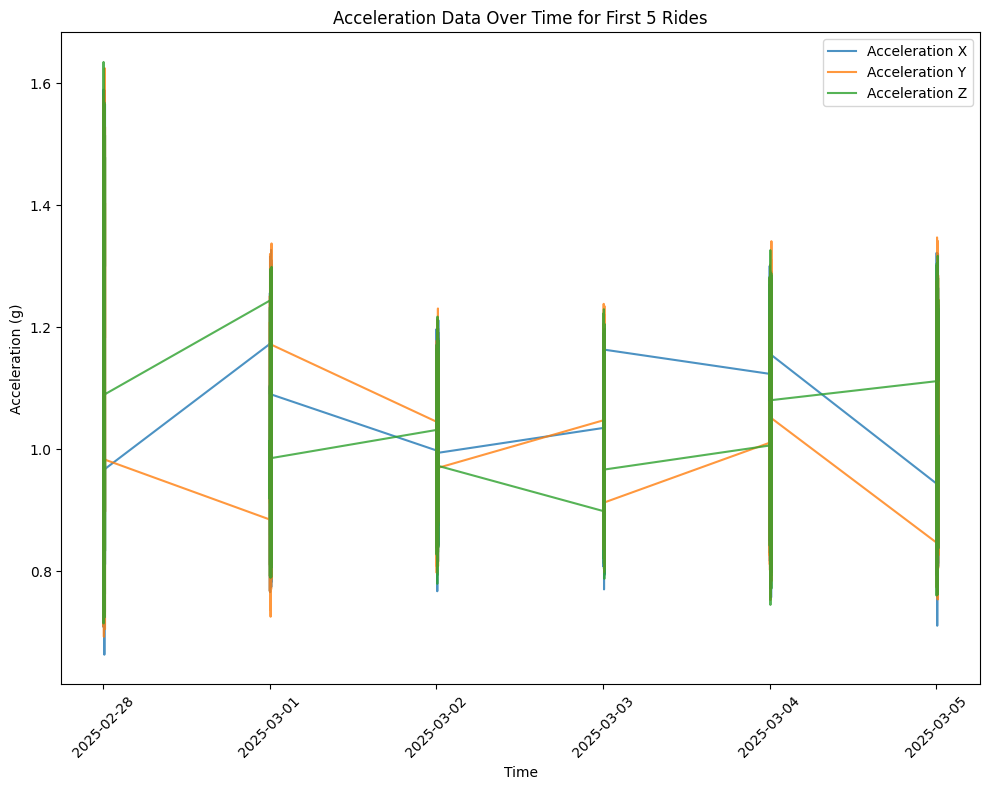

In [23]:

# Convert date and time columns to a single datetime column for better plotting
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

no_of_rides = 5
# Filter the DataFrame to include only the first 'no_of_rides'
filtered_df = df[df['date'].isin(df['date'].unique()[:no_of_rides + 1])]

# Call the function to plot the data
plot_acceleration_data(filtered_df['datetime'], filtered_df['accel_x'], filtered_df['accel_y'], filtered_df['accel_z'], no_of_rides)

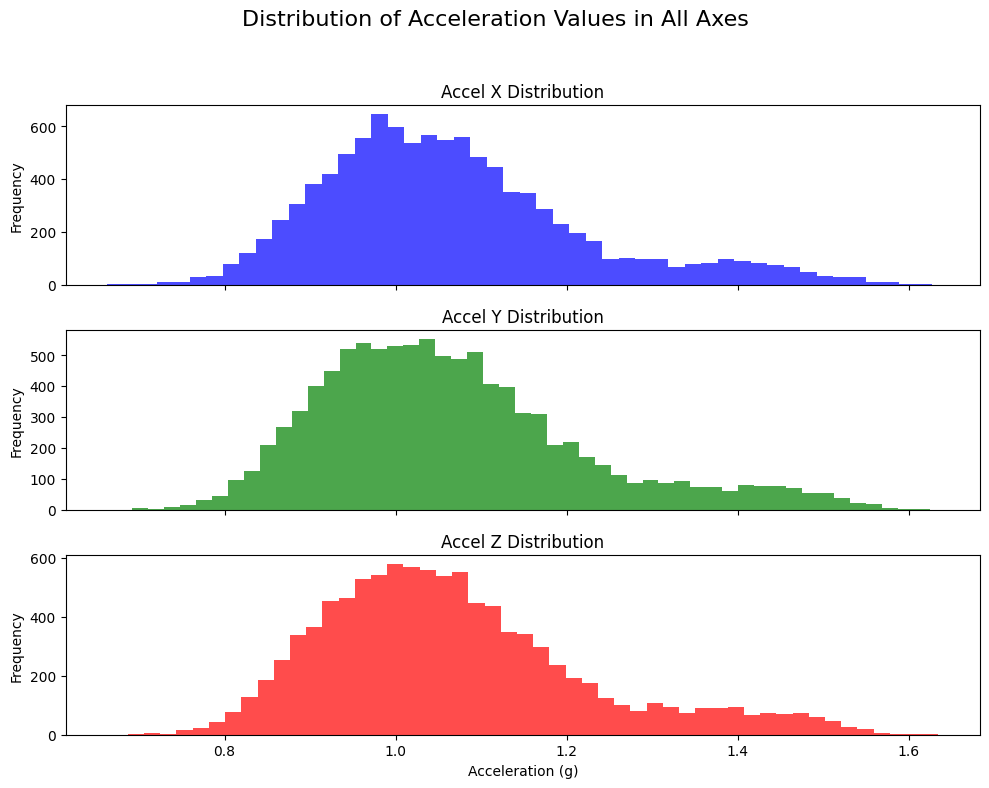

In [24]:
# Create subplots for the three acceleration axes
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot histograms for each axis
axes[0].hist(df['accel_x'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Accel X Distribution')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['accel_y'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Accel Y Distribution')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['accel_z'], bins=50, color='red', alpha=0.7)
axes[2].set_title('Accel Z Distribution')
axes[2].set_xlabel('Acceleration (g)')
axes[2].set_ylabel('Frequency')

# Overall title and layout adjustments
fig.suptitle('Distribution of Acceleration Values in All Axes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

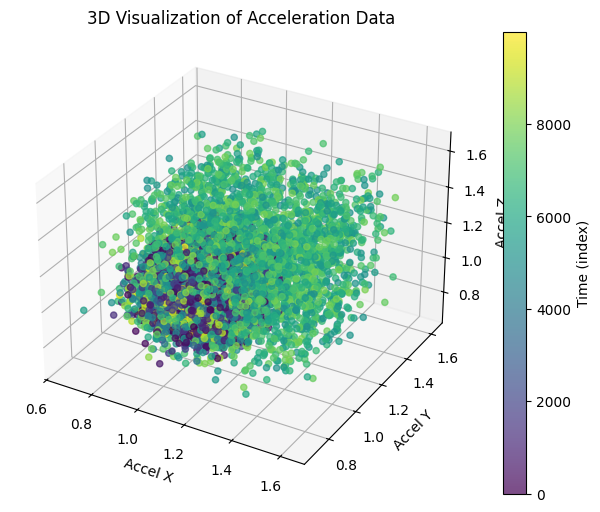

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot to visualize acceleration in all three axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['accel_x'], df['accel_y'], df['accel_z'],
                c=df.index, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Time (index)')
ax.set_xlabel('Accel X')
ax.set_ylabel('Accel Y')
ax.set_zlabel('Accel Z')
plt.title('3D Visualization of Acceleration Data')
plt.show()


In [26]:
# Print the number of records in df
print(f'The number of records in the dataframe is: {len(df)}')


The number of records in the dataframe is: 10000


In [27]:
sampling_rate = 25
window_size = 50
# Calculate a rolling mean for smoothing the acceleration data
df['rolling_mean_x'] = df['accel_x'].rolling(window=window_size).mean()
df['rolling_mean_y'] = df['accel_y'].rolling(window=window_size).mean()
df['rolling_mean_z'] = df['accel_z'].rolling(window=window_size).mean()

# Drop the first 50 records
alt_df = df.iloc[window_size::sampling_rate].reset_index(drop=True)


In [28]:
alt_df.describe()

,accel_x,accel_y,accel_z,datetime,rolling_mean_x,rolling_mean_y,rolling_mean_z
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000
mean,1.063949,1.055563,1.070658,2025-02-28 11:35:36.118090240,1.065321,1.065351,1.066741
min,0.737092,0.766509,0.775108,2025-02-24 00:00:00,0.977146,0.976045,0.976504
25%,0.965255,0.951040,0.952209,2025-02-26 00:08:01.249999872,1.017258,1.014613,1.015374
50%,1.046159,1.030038,1.044874,2025-02-28 00:16:02.500000,1.033051,1.035662,1.036709
75%,1.140117,1.127477,1.152648,2025-03-03 00:07:23.750000128,1.128710,1.136169,1.132958
max,1.573610,1.555782,1.548541,2025-03-05 00:16:15,1.217448,1.232015,1.240482
std,0.151070,0.150025,0.164866,NaN,0.064908,0.066910,0.067410


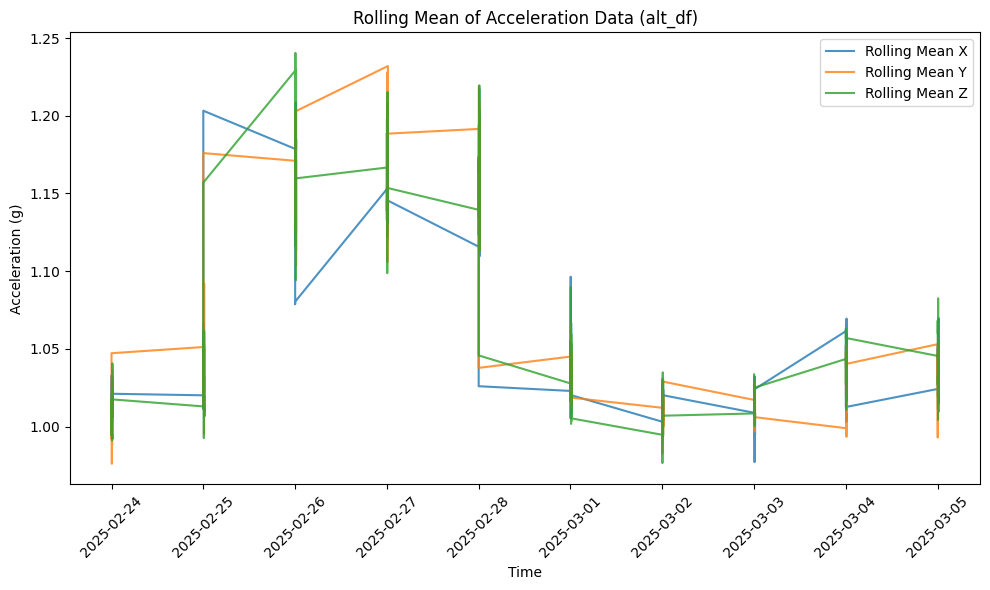

In [29]:
# Plot rolling means for alt_df
plt.figure(figsize=(10, 6))
plt.plot(alt_df['datetime'], alt_df['rolling_mean_x'], label='Rolling Mean X', alpha=0.8)
plt.plot(alt_df['datetime'], alt_df['rolling_mean_y'], label='Rolling Mean Y', alpha=0.8)
plt.plot(alt_df['datetime'], alt_df['rolling_mean_z'], label='Rolling Mean Z', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Acceleration (g)')
plt.title('Rolling Mean of Acceleration Data (alt_df)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
# Install the required packages using poetry
!poetry add tensorflow
!poetry add scikit-learn


The following packages are already present in the pyproject.toml and will be skipped:

  - tensorflow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - scikit-learn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [21]:

# Use the rolling means for further processing, considering overlap
X = alt_df[['rolling_mean_x', 'rolling_mean_y', 'rolling_mean_z']].dropna().values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data for training and testing
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Define a simple Autoencoder model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(X_train.shape[1], activation='linear')
])


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [22]:
# Train the model
history = model.fit(X_train, X_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, X_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3411 - val_loss: 0.0016
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 4.1625e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7512e-04 - val_loss: 2.8253e-04
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6790e-04 - val_loss: 2.0677e-04
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0490e-04 - val_loss: 2.1192e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6615e-04 - val_loss: 1.3980e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3345e-04 - val_loss: 1.7901e-04
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3305e-04 - val_loss: 1.0247e-04
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2327e-04 - val_loss: 1.3012e-04
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0881e-04 - val_loss: 9.1718e-05


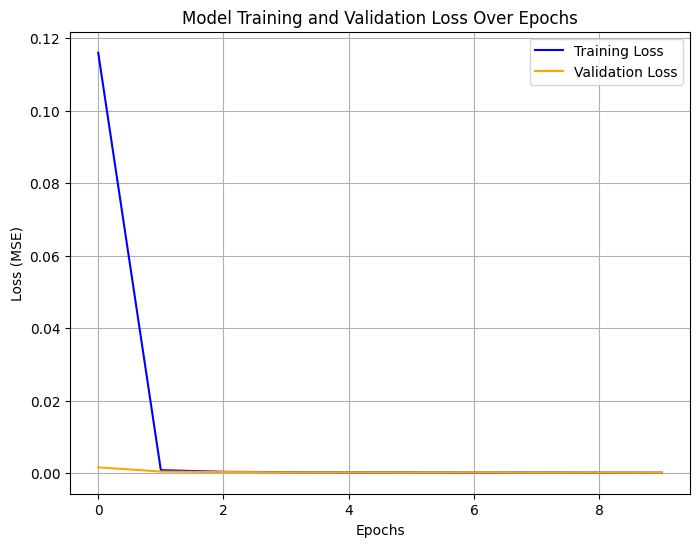

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


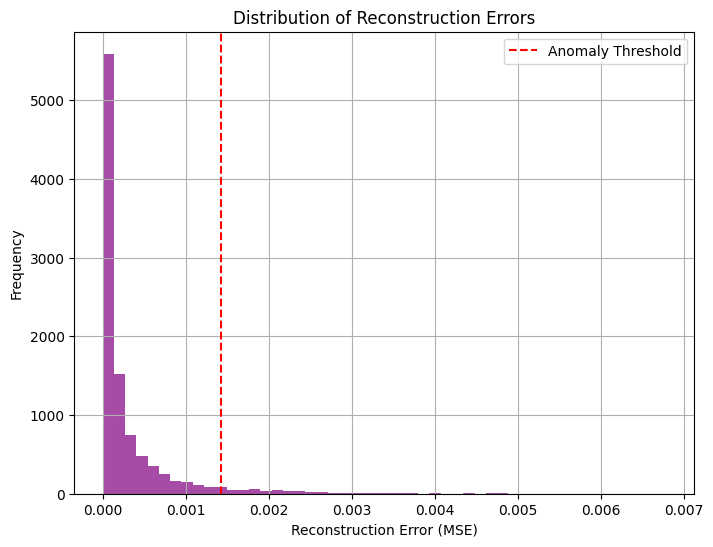

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(mse, bins=50, color='purple', alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Calculate reconstruction errors
reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Set an anomaly detection threshold (e.g., 95th percentile)
threshold = np.percentile(mse, 95)
print(f"Anomaly detection threshold: {threshold:.4f}")

# Anomaly score function
def detect_anomaly(data_points, model, threshold, scaler):
    data_scaled = scaler.transform(data_points)
    reconstructions = model.predict(data_scaled)
    errors = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)
    collision_probability = np.mean(errors > threshold)
    return collision_probability

# Example usage with the last 20 sensor readings
latest_data = df[['accel_x', 'accel_y', 'accel_z']].values[-20:]
collision_probability = detect_anomaly(latest_data, model, threshold, scaler)
print(f"Collision Probability: {collision_probability:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Anomaly detection threshold: 0.0003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Collision Probability: 0.00


In [28]:
def generate_acceleration_data(num_records=1000, anomalies=[]):
    """
    Generate synthetic acceleration data with optional anomalies.

    Parameters:
        num_records (int): Number of data points to generate.
        anomalies (list): List of anomalies in the format:
            [[start_index, end_index, spike_value, variation_degree], ...]

            - start_index (int): Start index of the anomaly.
            - end_index (int): End index of the anomaly.
            - spike_value (float): The target anomalous acceleration value.
            - variation_degree (float): The noise level during the anomaly.

    Returns:
        pd.DataFrame: DataFrame with synthetic acceleration data.
    """

    # Define date and time for the dataset
    base_date = datetime.now()

    # Define normal acceleration ranges for different driving contexts
    contexts = ['highway', 'offroad', 'urban']
    ranges = {
        'highway': (0.9, 1.1),
        'offroad': (0.8, 1.5),
        'urban': (0.85, 1.2)
    }

    # Data storage
    data = []

    # Generate normal acceleration data
    for i in range(num_records):
        # Simulate different contexts randomly
        context = random.choice(contexts)
        accel_min, accel_max = ranges[context]

        # Normal acceleration with noise
        accel_x = np.random.uniform(accel_min, accel_max) + np.random.normal(0, 0.05)
        accel_y = np.random.uniform(accel_min, accel_max) + np.random.normal(0, 0.05)
        accel_z = np.random.uniform(accel_min, accel_max) + np.random.normal(0, 0.05)

        # Generate date and time
        date = (base_date - timedelta(seconds=i)).strftime('%Y-%m-%d')
        time = (datetime.min + timedelta(seconds=i)).time().strftime('%H:%M:%S')

        # Append normal data
        data.append([date, time, accel_x, accel_y, accel_z])

    # Apply anomalies to the data
    for anomaly in anomalies:
        start_index, end_index, spike_value, variation_degree = anomaly

        for i in range(start_index, min(end_index, num_records)):
            # Inject spikes or anomalies
            data[i][2] = spike_value + np.random.normal(0, variation_degree)  # accel_x
            data[i][3] = spike_value + np.random.normal(0, variation_degree)  # accel_y
            data[i][4] = spike_value + np.random.normal(0, variation_degree)  # accel_z

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['date', 'time', 'accel_x', 'accel_y', 'accel_z'])

    # Save to CSV
    df.to_csv('anomalous_acceleration_data.csv', index=False)
    print("Dataset generated: anomalous_acceleration_data.csv")

    return df

# Example usage
anomalies = [
    [100, 120, 2.0, 0.2],   # Anomaly between index 100 and 120 with spike 2.0 and variation 0.2
    [500, 550, 3.0, 0.3],   # Anomaly between index 500 and 550 with spike 3.0 and variation 0.3
    [800, 850, 1.8, 0.1]    # Anomaly between index 800 and 850 with spike 1.8 and variation 0.1
]

# Generate the data with anomalies
df = generate_acceleration_data(num_records=1000, anomalies=anomalies)


Dataset generated: anomalous_acceleration_data.csv


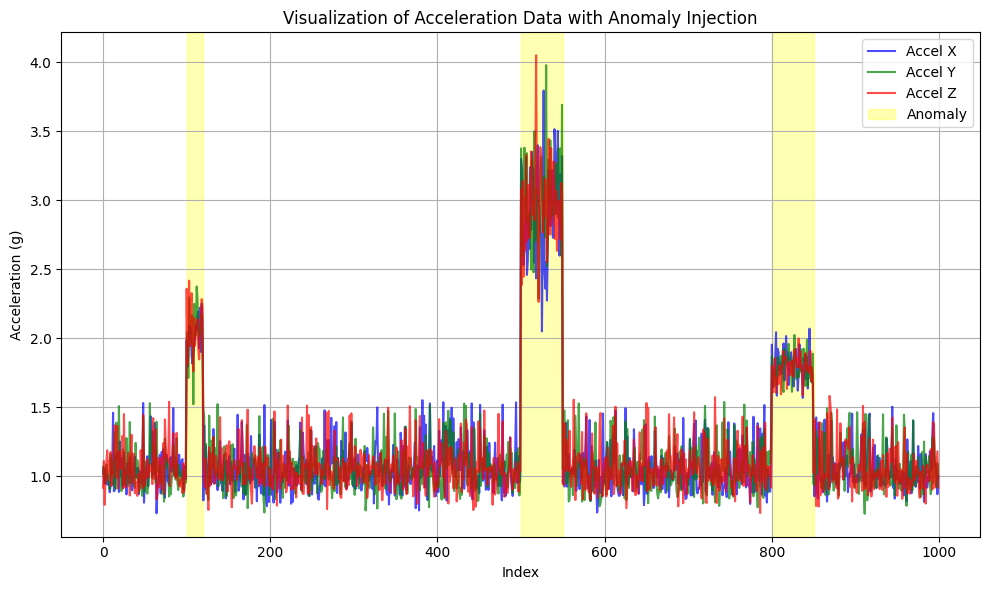

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated CSV file
df = pd.read_csv('anomalous_acceleration_data.csv')

# Define the anomalies for visualization
anomalies = [
    [100, 120, 2.0, 0.2],   # Anomaly between index 100 and 120 with spike 2.0 and variation 0.2
    [500, 550, 3.0, 0.3],   # Anomaly between index 500 and 550 with spike 3.0 and variation 0.3
    [800, 850, 1.8, 0.1]    # Anomaly between index 800 and 850 with spike 1.8 and variation 0.1
]

# Plot the acceleration data to visualize anomalies
plt.figure(figsize=(10, 6))

# Plot each axis of acceleration
plt.plot(df.index, df['accel_x'], label='Accel X', color='blue', alpha=0.7)
plt.plot(df.index, df['accel_y'], label='Accel Y', color='green', alpha=0.7)
plt.plot(df.index, df['accel_z'], label='Accel Z', color='red', alpha=0.7)

# Highlight anomaly regions
for anomaly in anomalies:
    plt.axvspan(anomaly[0], anomaly[1], color='yellow', alpha=0.3, label='Anomaly' if anomaly == anomalies[0] else "")

# Add labels and legends
plt.xlabel('Index')
plt.ylabel('Acceleration (g)')
plt.title('Visualization of Acceleration Data with Anomaly Injection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
